In [1]:
# case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data
market_df = pd.read_csv('market_fact.csv')
customer_df = pd.read_csv('cust_dimen.csv')
product_df = pd.read_csv('prod_dimen.csv')
shipping_df = pd.read_csv('shipping_dimen.csv')
orders_df = pd.read_csv('orders_dimen.csv')


**Comparing distribution of sales of various product categories**

In [5]:
df = pd.merge(market_df, product_df, how='inner', on='Prod_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


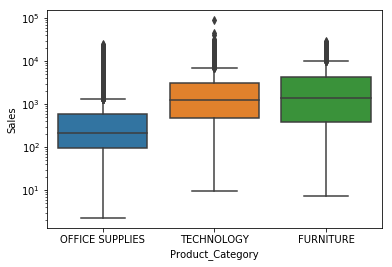

In [7]:
# boxplot of sales accros various product categories
sns.boxplot(x='Product_Category', y='Sales', data=df)
plt.yscale('log')

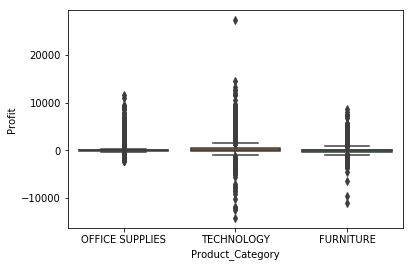

In [9]:
# boxplot of profit accros various product categories
sns.boxplot(x='Product_Category', y='Profit', data=df)
# plt.yscale('log')

Profit has some outliers which are making the boxplot unreadbale. We remove some extreme values from profit to make it readable

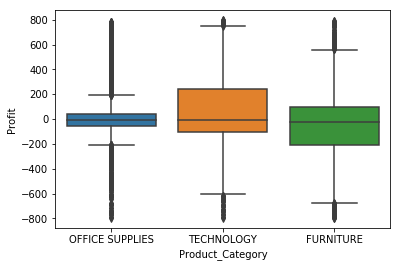

In [12]:
df = df[(df.Profit < 1000) & (df.Profit>-1000)]
sns.boxplot(x='Product_Category', y='Profit', data=df)

Text(0.5, 1.0, 'Profit')

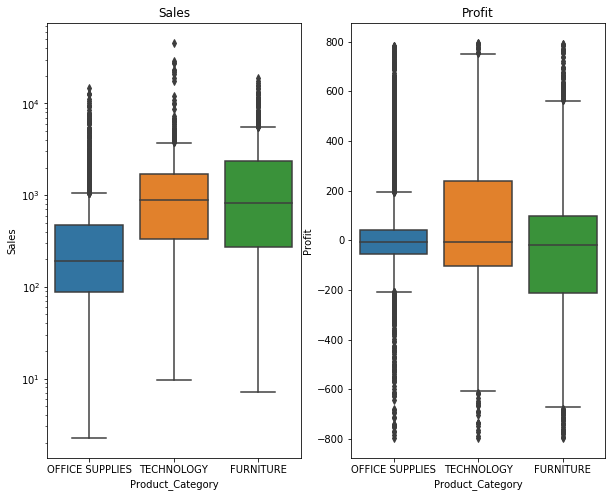

In [17]:
# adjust figure size
plt.figure(figsize=(10, 8))

# subplot 1: sales
plt.subplot(1, 2, 1)
sns.boxplot(x='Product_Category', y='Sales', data=df)
plt.yscale('log')
plt.title('Sales')

# subplot 2: Profit
plt.subplot(1, 2, 2)
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.title('Profit')

In [20]:
# finding relations with customer_segment
df = pd.merge(df, customer_df, how='inner', on='Cust_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


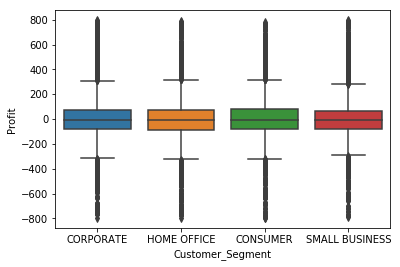

In [21]:
sns.boxplot(x='Customer_Segment', y='Profit', data=df)

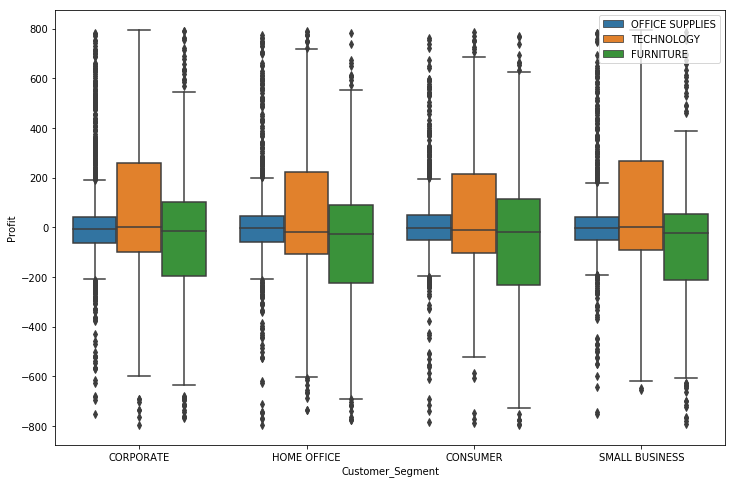

In [24]:
# distribution acrross 2 categorical variables
plt.figure(figsize=(12, 8), edgecolor='k', facecolor='w')

sns.boxplot(x='Customer_Segment', y='Profit', hue='Product_Category', data=df)
plt.legend(loc='upper right')

Text(0, 0.5, 'Percentage shipping cost of sales')

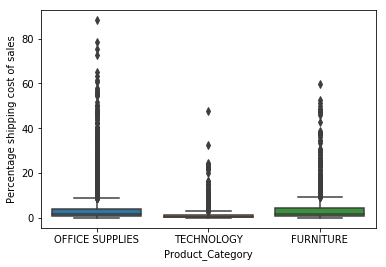

In [28]:
# shipping cost as percentage of sales amount
sns.boxplot(x=df['Product_Category'], y=100*df['Shipping_Cost']/df['Sales'])
plt.ylabel('Percentage shipping cost of sales')

### Aggregated Values Across Categories

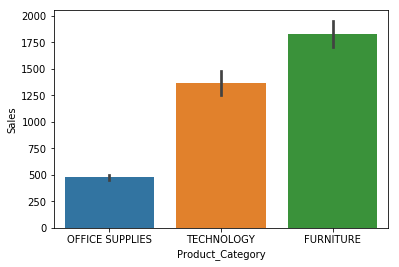

In [31]:
# average sales accross product categories
sns.barplot(x='Product_Category', y='Sales', data=df)

Text(0.5, 1.0, 'Median')

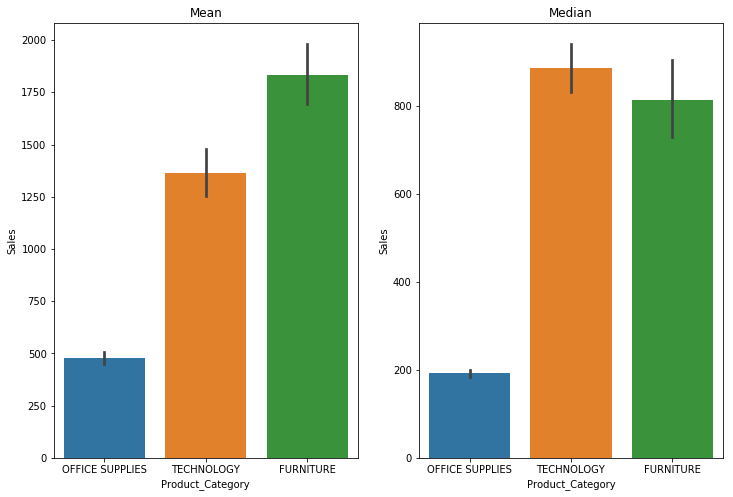

In [32]:
# mean and median on subplot
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x='Product_Category', y='Sales', data=df)
plt.title('Mean')

plt.subplot(1,2,2)
sns.barplot(x='Product_Category', y='Sales', data=df, estimator=np.median)
plt.title('Median')

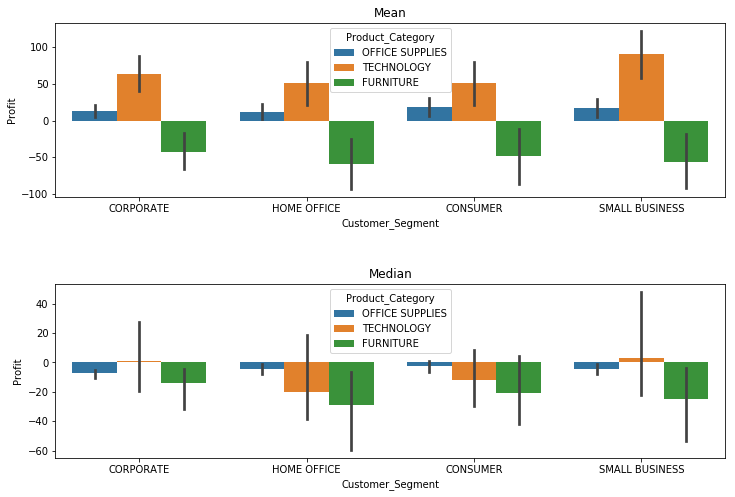

In [38]:
# mean and median on subplot
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
sns.barplot(x='Customer_Segment', y='Profit', hue='Product_Category', data=df)
plt.title('Mean')

plt.subplot(2,1,2)
sns.barplot(x='Customer_Segment', y='Profit', hue='Product_Category', data=df, estimator=np.median)
plt.title('Median')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

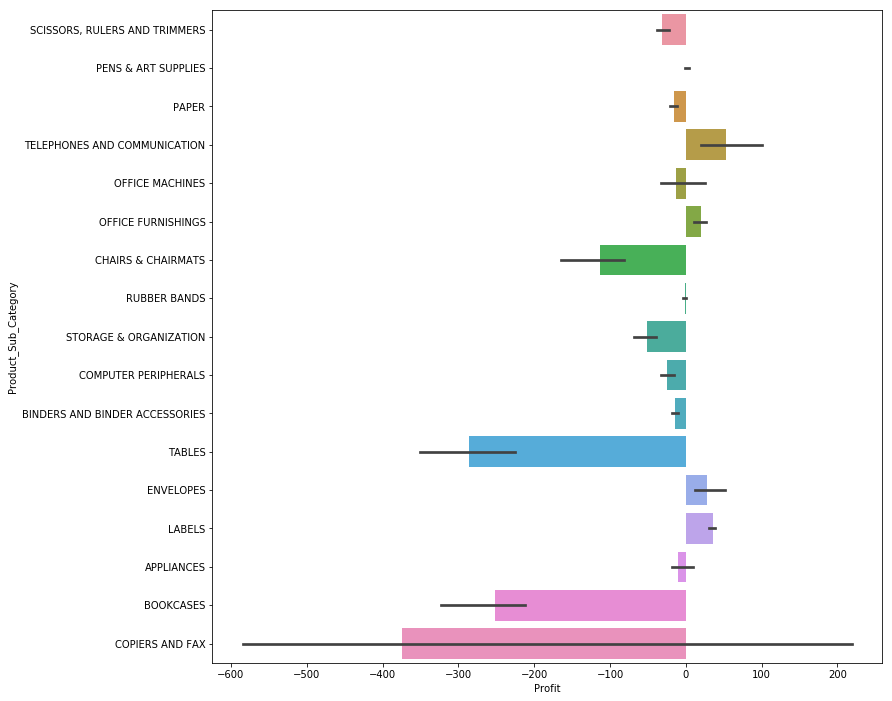

In [39]:
# comparing product sub categories
plt.figure(figsize=(12,12))
sns.barplot(x='Profit', y='Product_Sub_Category', data=df, estimator=np.median)


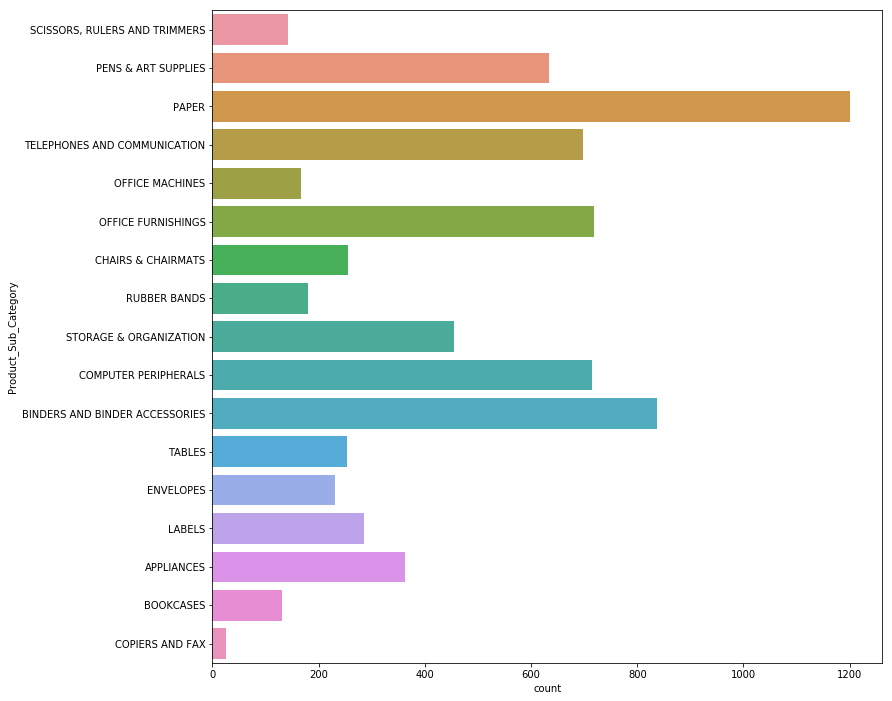

In [41]:
# count plot
plt.figure(figsize=(12,12))
sns.countplot(y='Product_Sub_Category', data=df)

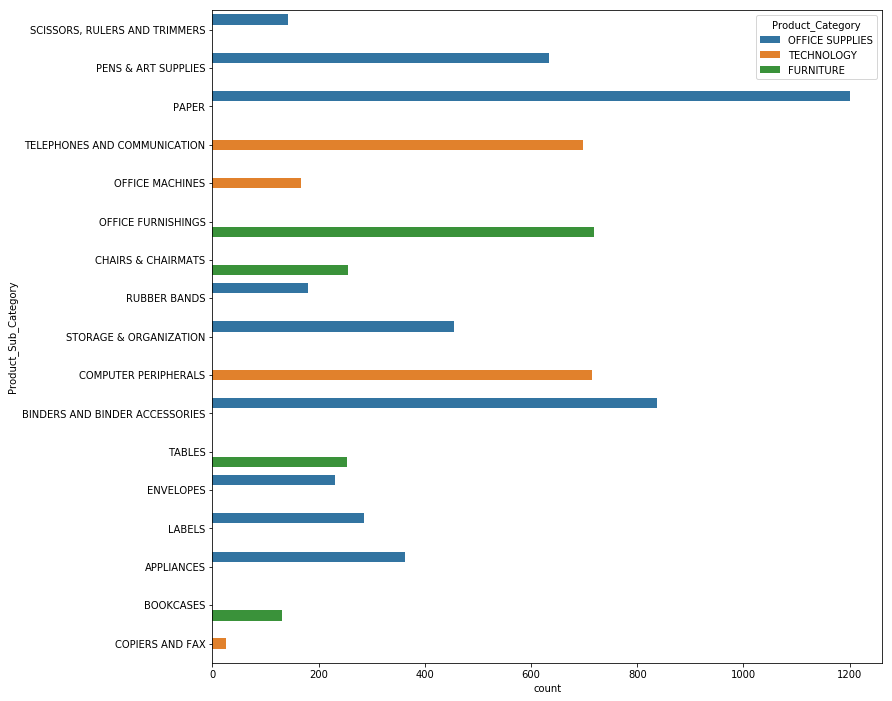

In [42]:
# count plot with hue
plt.figure(figsize=(12,12))
sns.countplot(y='Product_Sub_Category', data=df, hue='Product_Category')